In [1]:
import numpy as np
import sqlite3
import plotly.express as px
import pandas as pd
import sqlite3
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import statsmodels
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from useful_functions_2 import *
from pdf2image import convert_from_path
from sklearn.manifold import TSNE

### Process Data

In [2]:
tables_to_join = ["tPlantMicrobeSuperkingdom", "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df = full_df.T.drop_duplicates().T
full_df.shape

(668, 13)

In [3]:
full_df.rename(columns={'genera': 'taxa'}, inplace=True)
full_df.head()

,sample_id,taxa,relative_abundance,site_id,collect_date,V1,V2,species,PC1,PC2,PC3,PC4,PC5
0,RRL1,Viruses,7.4096,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
1,RRL1,Bacteria,1.80623,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
2,RRL1,Eukaryota,0.09221,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
3,RRL1,Archaea,0.00829,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
4,RRL9,Viruses,4.30893,RRL,6/25/2021,0.581366,0.418634,exaltata,0.097719,0.094733,-0.00656,0.012822,-0.022248


In [4]:
opdf = full_df.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='taxa', values='relative_abundance')
opdf.head()

,,,taxa,Archaea,Bacteria,Eukaryota,Viruses
sample_id,site_id,species,V2,,,,
CMB10,CMB,syriaca,0.999777121,0.04703,13.48798,0.45498,0.59209
CMB11,CMB,syriaca,0.999999983,0.0342,7.30326,0.38316,6.9631
CMB13,CMB,syriaca,0.989130596,0.03744,9.05665,0.5387,5.2553
CMB14,CMB,syriaca,0.99999205,0.03768,3.52734,0.28762,9.35067
CMB15,CMB,syriaca,0.998547653,0.01157,22.08254,0.15644,2.03997


In [5]:
opdf = opdf.reset_index()
taxa_columns = opdf.columns
taxa_columns = taxa_columns.drop(['sample_id','site_id', 'species', 'V2'])

In [6]:
opdf = opdf.fillna(0)
opdf.head()

taxa,sample_id,site_id,species,V2,Archaea,Bacteria,Eukaryota,Viruses
0,CMB10,CMB,syriaca,0.999777,0.04703,13.48798,0.45498,0.59209
1,CMB11,CMB,syriaca,1.000000,0.03420,7.30326,0.38316,6.96310
2,CMB13,CMB,syriaca,0.989131,0.03744,9.05665,0.53870,5.25530
3,CMB14,CMB,syriaca,0.999992,0.03768,3.52734,0.28762,9.35067
4,CMB15,CMB,syriaca,0.998548,0.01157,22.08254,0.15644,2.03997


In [7]:
df1 = opdf.groupby(['site_id'])[taxa_columns].mean()

In [8]:
df1.head()

taxa,Archaea,Bacteria,Eukaryota,Viruses
site_id,,,,
CMB,0.039060,9.931394,0.428802,5.034622
FRW,0.015712,4.978846,0.021157,2.777255
HR,0.059175,2.470185,0.016112,2.474990
LFS,0.042570,7.675431,0.073676,3.493406
LM,0.021257,4.655714,0.044744,2.411598


In [9]:
df1 = df1.reset_index()

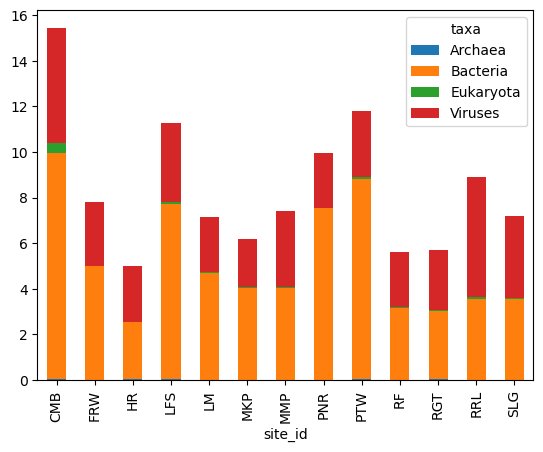

In [10]:
ax = df1.plot.bar(x = 'site_id', stacked=True)

In [11]:
opdf[opdf['species'] == 'hybrid']


taxa,sample_id,site_id,species,V2,Archaea,Bacteria,Eukaryota,Viruses
101,PNR2,PNR,hybrid,1.0,0.01669,14.39847,0.01668,0.52422


### Function for All Taxa

Superkingdom


C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


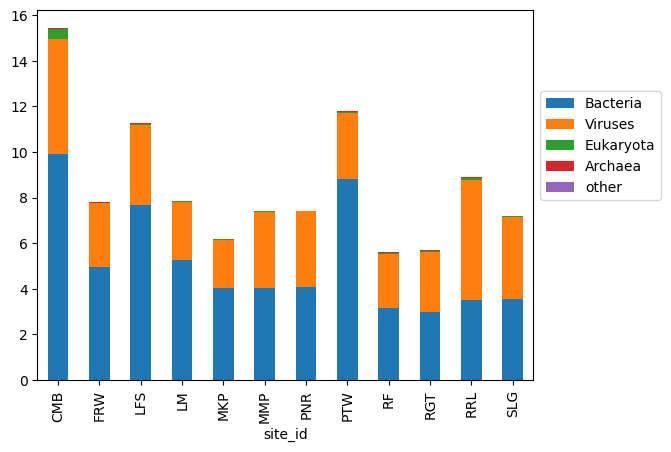

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


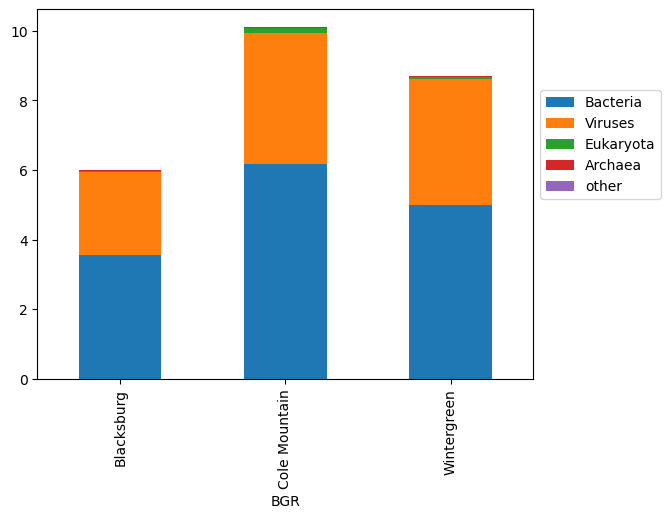

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


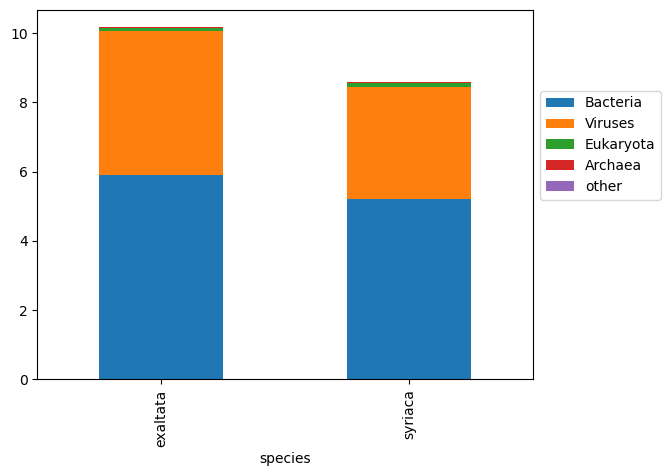

Phylum


C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


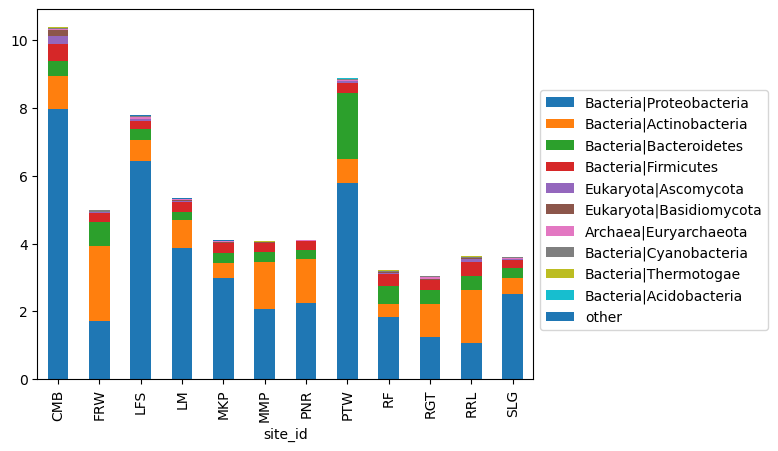

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


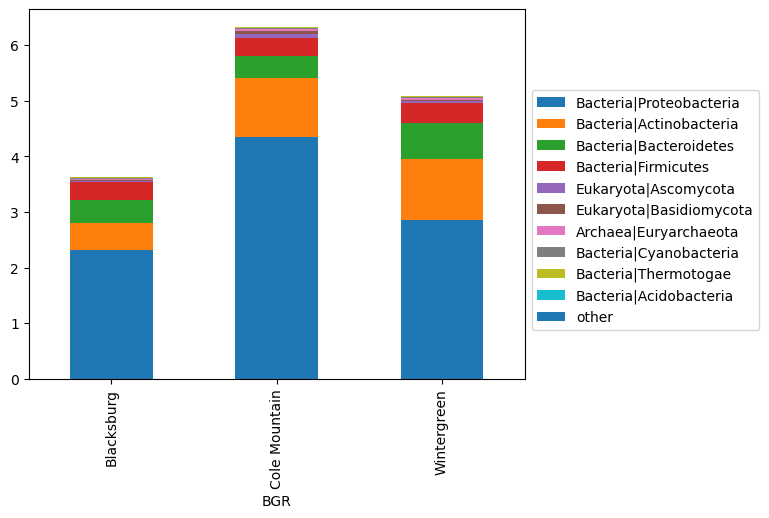

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


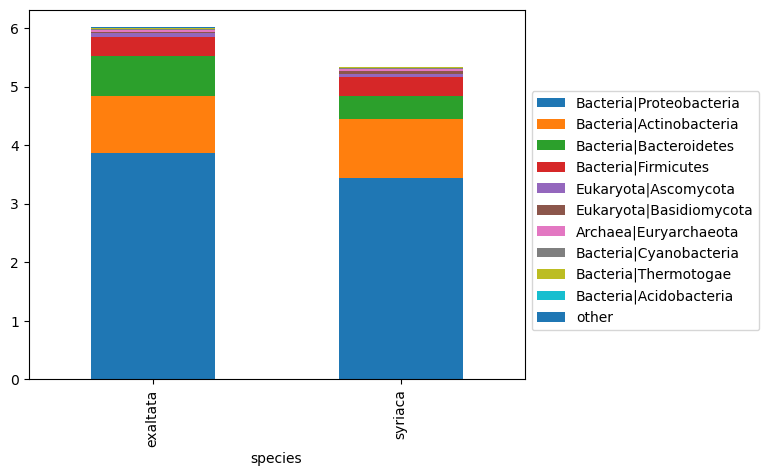

Class


C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  opdf['BGR'] = site_list
C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


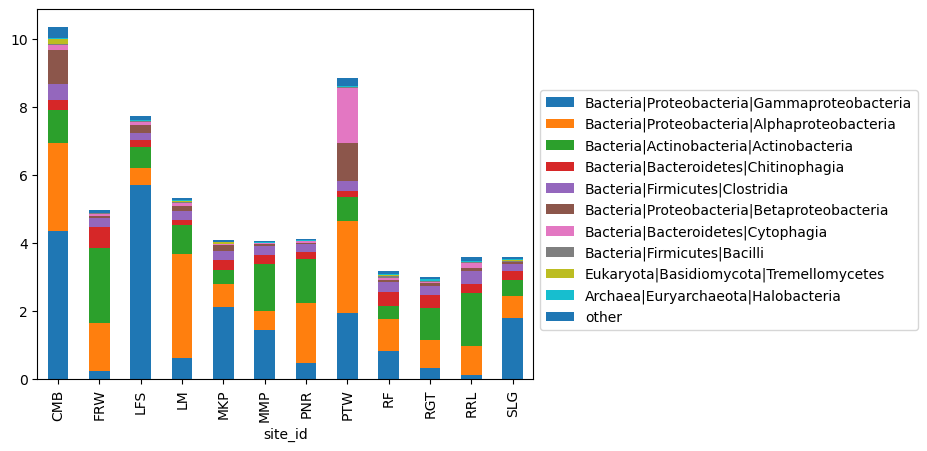

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


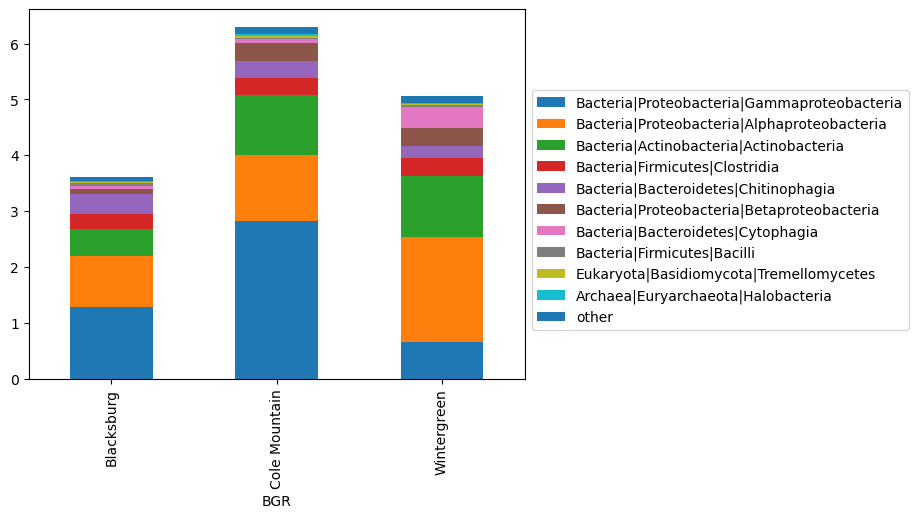

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


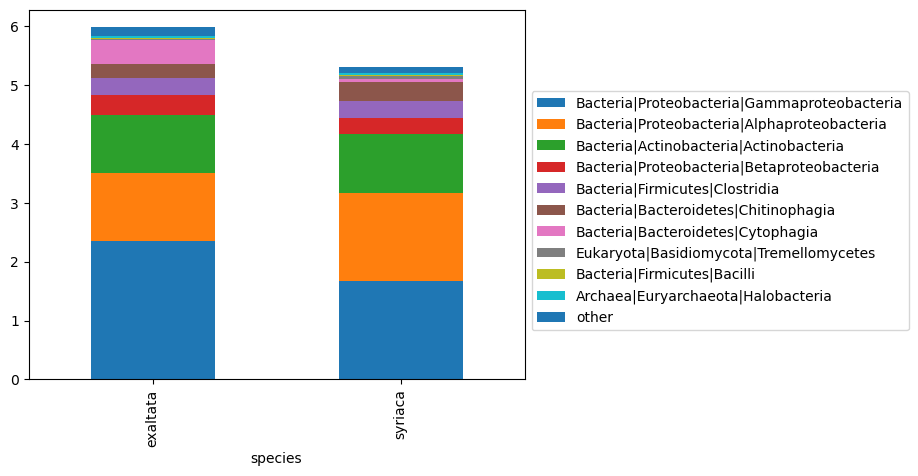

Order


C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  opdf['BGR'] = site_list
C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


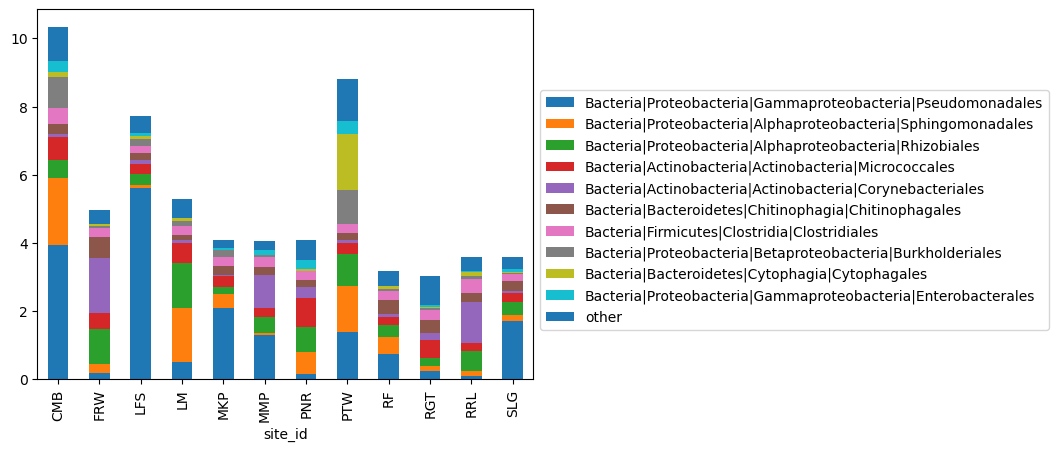

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


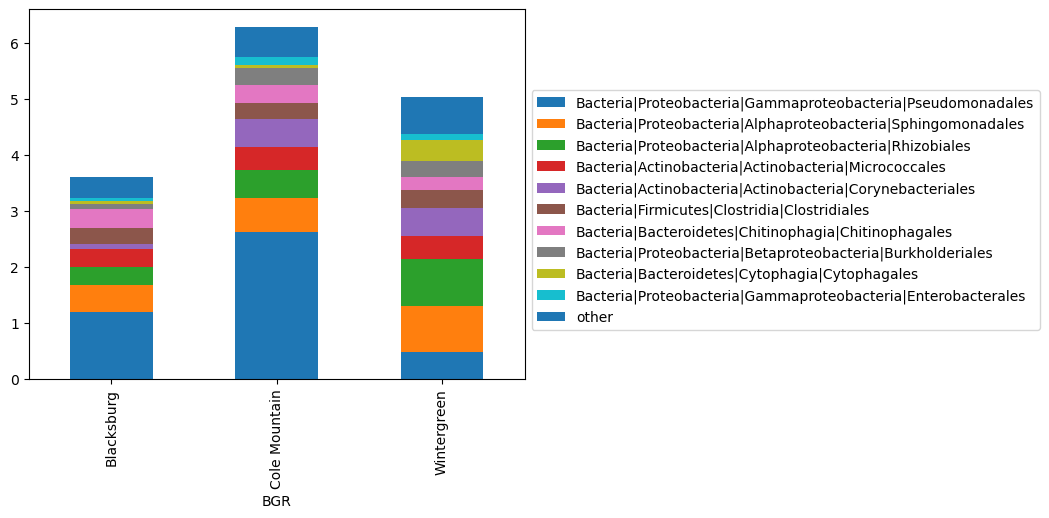

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


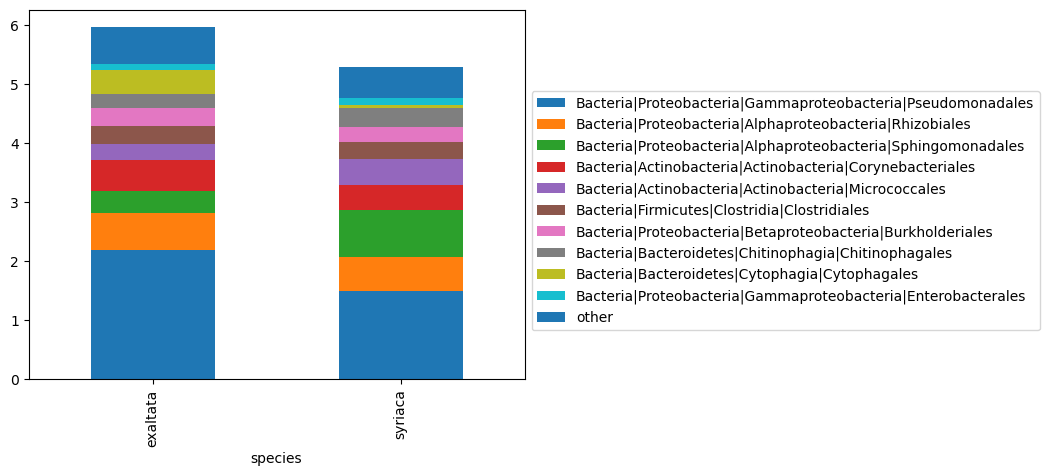

Family


C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  opdf['BGR'] = site_list
C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


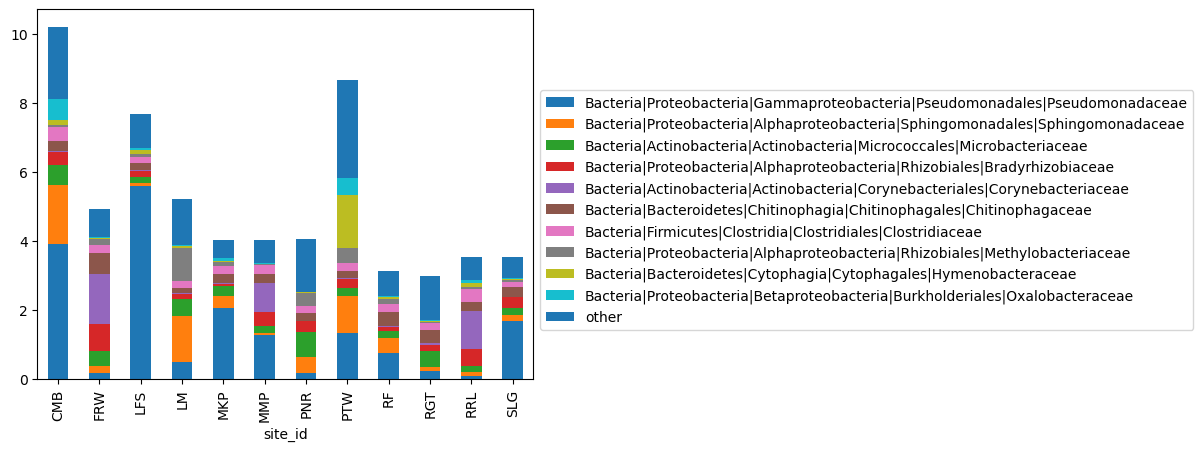

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


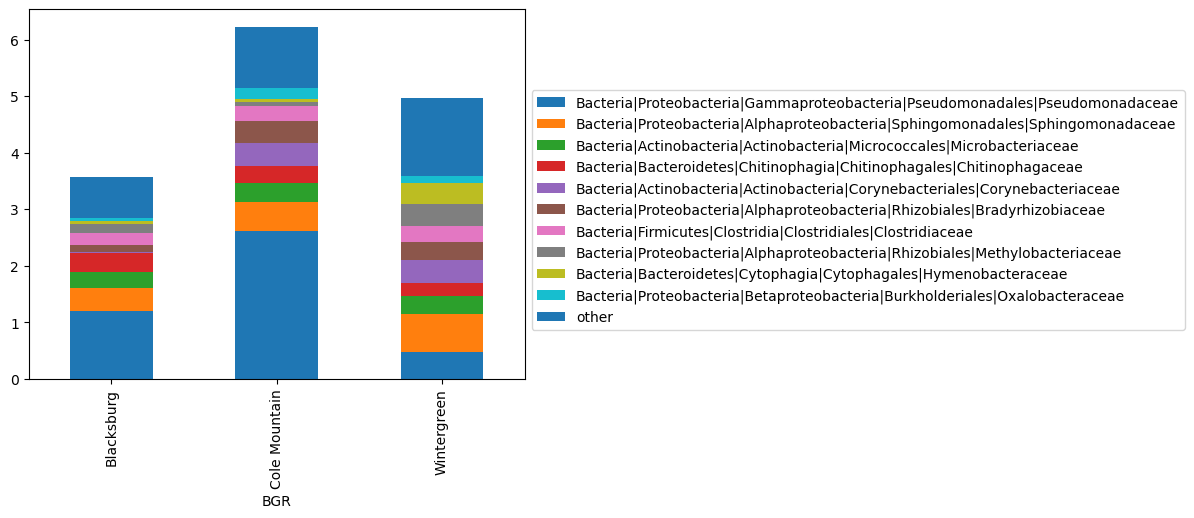

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


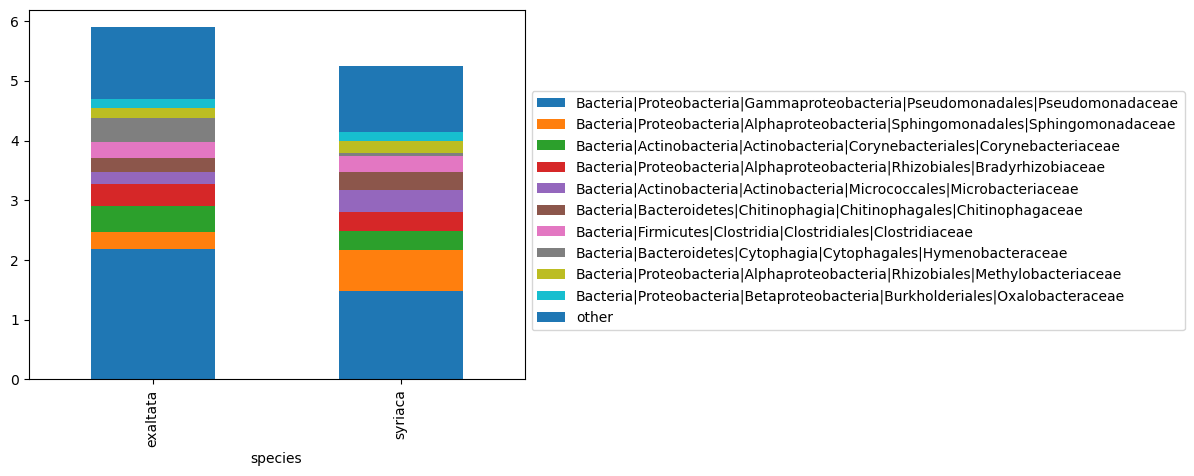

Genus


C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  opdf['BGR'] = site_list
C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


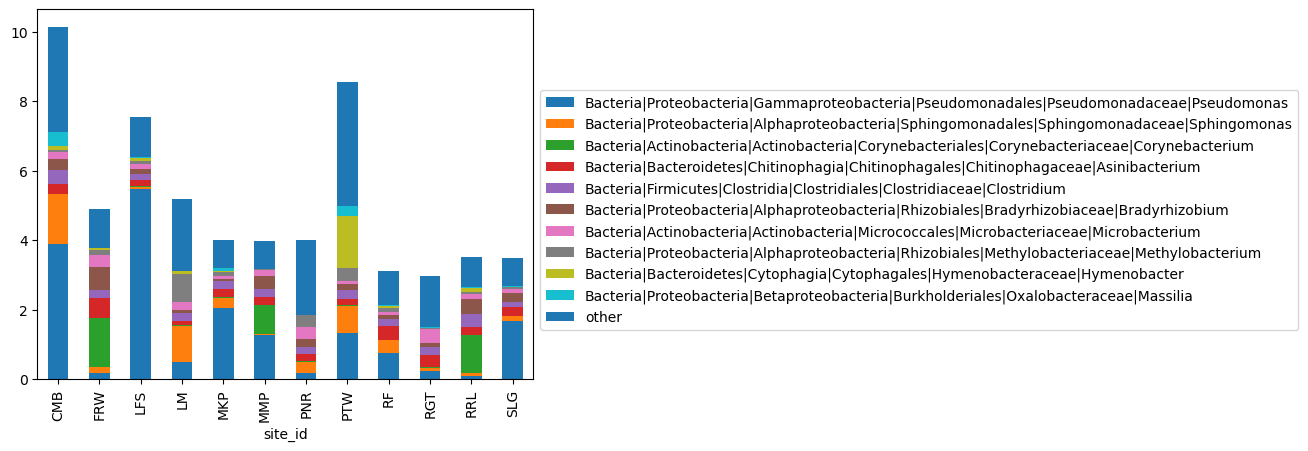

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


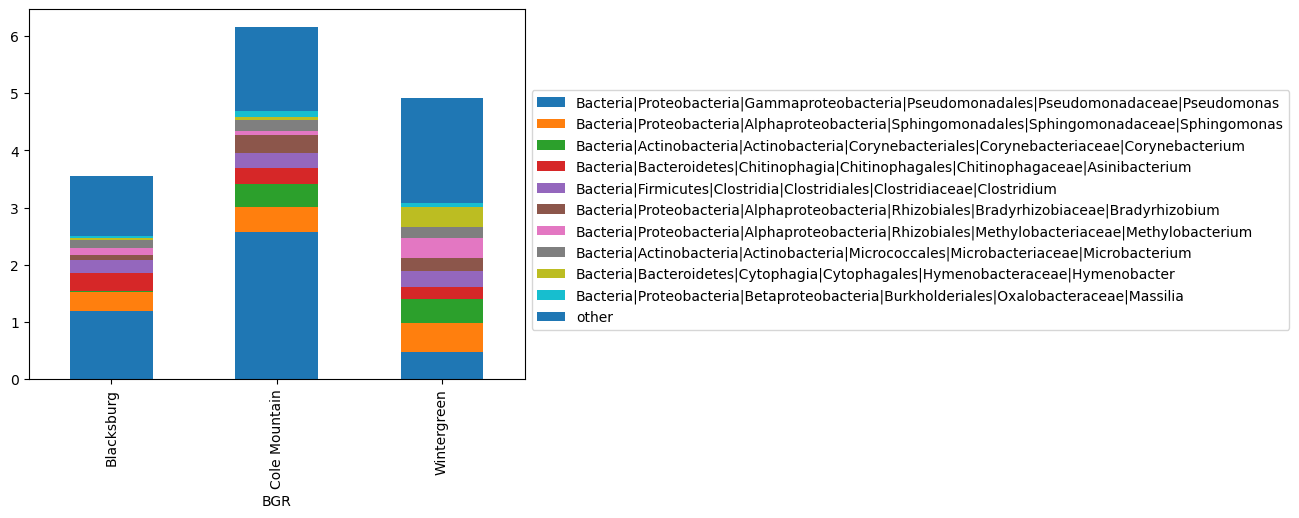

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


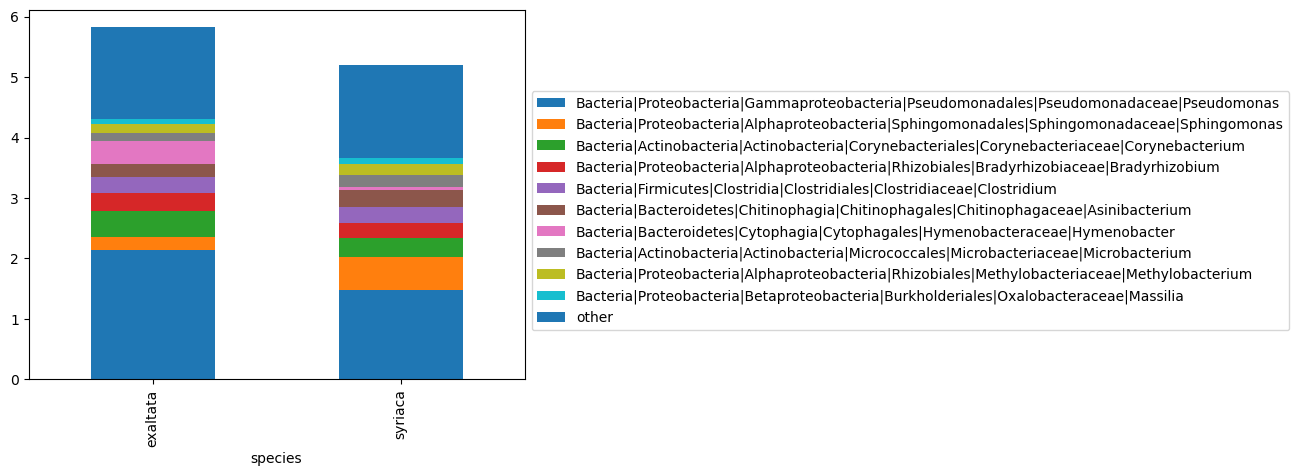

Species


C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  opdf['BGR'] = site_list
C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


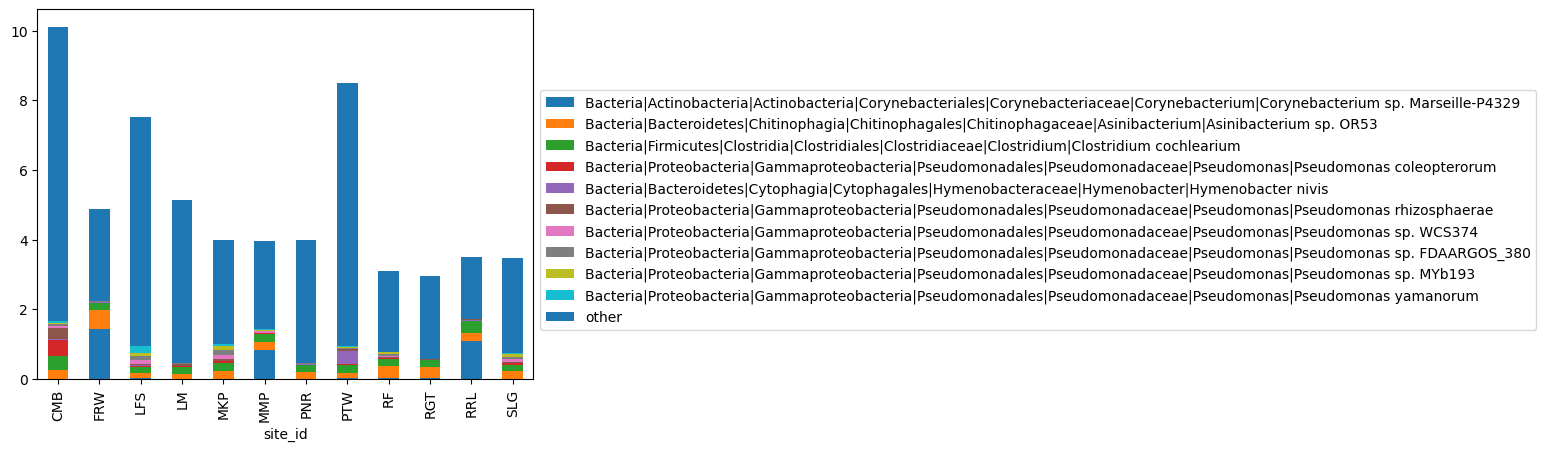

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


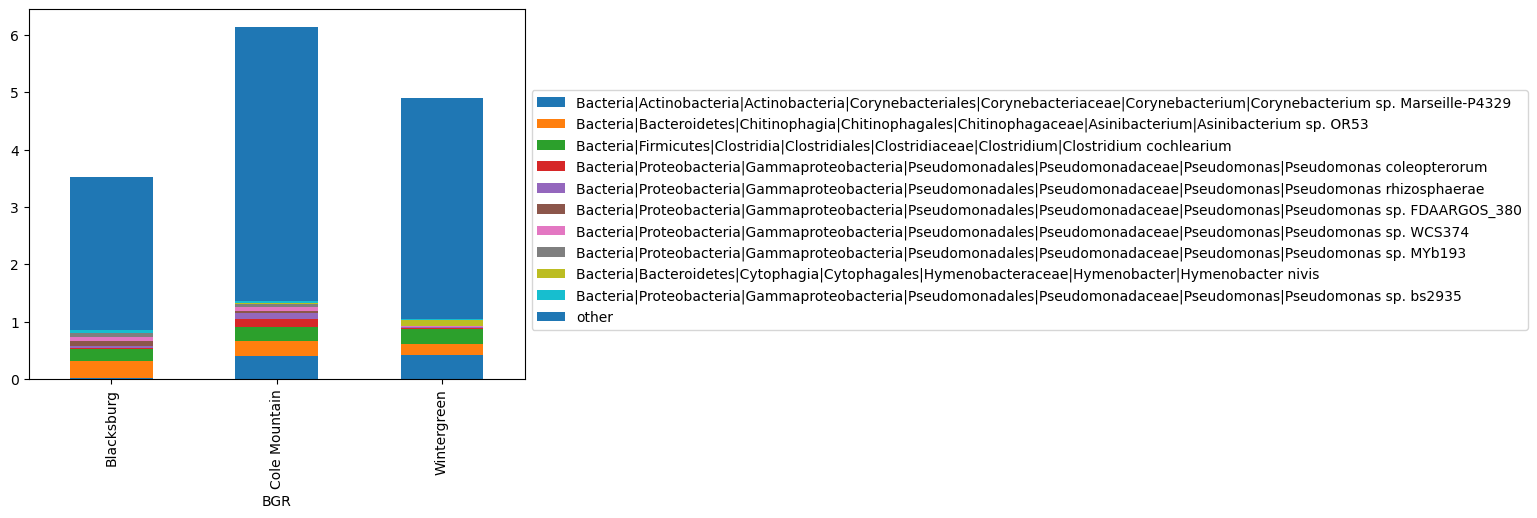

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\949533.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


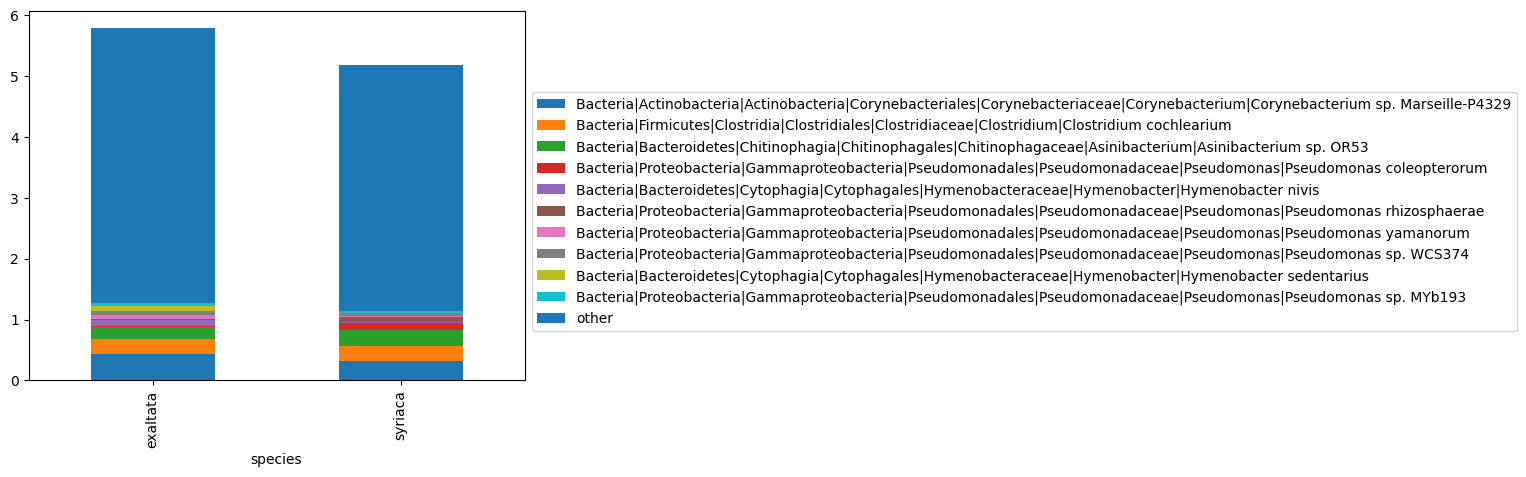

In [12]:
taxa_list = ['Superkingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
for taxa_level in taxa_list:
    print(taxa_level)
    table_name = 'tPlantMicrobe' + taxa_level
    tables_to_join = [table_name, "tSample", "tPlantDNA"]
    common_column = "sample_id"
    full_df = import_all_data(tables_to_join, common_column)
    full_df = full_df.T.drop_duplicates().T
    full_df.shape
    full_df.rename(columns={'genera': 'taxa'}, inplace=True)
    opdf = full_df.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='taxa', values='relative_abundance')
    opdf = opdf.reset_index()
    taxa_columns = opdf.columns
    taxa_columns = taxa_columns.drop(['sample_id','site_id', 'species', 'V2'])
    opdf = opdf.fillna(0)   
    opdf = opdf[opdf['species'].isin(['exaltata', 'syriaca'])]
#     df1 = opdf.groupby(['site_id'])[taxa_columns].mean()
#     df1 = df1.reset_index()
#     ax = df1.plot.bar(x = 'site_id', stacked=True)
#     ax.get_legend().remove()
#     plt.show()
#     df2 = opdf.groupby(['species'])[taxa_columns].mean()
#     df2 = df2.reset_index()
#     ax = df2.plot.bar(x = 'species', stacked=True)
#     ax.get_legend().remove()
#     plt.show()

    site_list = opdf['site_id']

    opdf['BGR'] = site_list

    opdf['BGR'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                        'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1,'HR': 3}, inplace=True) #
    opdf = opdf[opdf["BGR"].isin([0,1,2,3])]

    opdf['BGR'] = opdf['BGR'].replace([0], 'Wintergreen')
    opdf['BGR'] = opdf['BGR'].replace([1], 'Cole Mountain')
    opdf['BGR'] = opdf['BGR'].replace([2], 'Blacksburg')
    opdf['BGR'] = opdf['BGR'].replace([3], 'HR')
    
    
    df1 = opdf.groupby(['site_id'])[taxa_columns].mean()
    df1 = df1.reset_index()
    new_columns = df1[taxa_columns].sum().nlargest(10)
    col_list = []
    for i in new_columns.axes[0]:
        col_list.append(i)
    col_list.append('site_id')
    other_col = df1.columns
    other_col = other_col.drop(col_list)
    df2 = df1[col_list]
    df3 = df1[other_col]
    df2['other'] = df3.sum(axis = 1)
    ax = df2.plot.bar(x = 'site_id', stacked=True)
    ax.legend(bbox_to_anchor=(1,0.8))
    plt.show()
    
    df1 = opdf.groupby(['BGR'])[taxa_columns].mean()
    df1 = df1.reset_index()
    new_columns = df1[taxa_columns].sum().nlargest(10)
    col_list = []
    for i in new_columns.axes[0]:
        col_list.append(i)
    col_list.append('BGR')
    other_col = df1.columns
    other_col = other_col.drop(col_list)
    df2 = df1[col_list]
    df3 = df1[other_col]
    df2['other'] = df3.sum(axis = 1)
    ax = df2.plot.bar(x = 'BGR', stacked=True)
    ax.legend(bbox_to_anchor=(1,0.8))
    plt.show()
    
    df1 = opdf.groupby(['species'])[taxa_columns].mean()
    df1 = df1.reset_index()
    new_columns = df1[taxa_columns].sum().nlargest(10)
    col_list = []
    for i in new_columns.axes[0]:
        col_list.append(i)
    col_list.append('species')
    other_col = df1.columns
    other_col = other_col.drop(col_list)
    df2 = df1[col_list]
    df3 = df1[other_col]
    df2['other'] = df3.sum(axis = 1)
    ax = df2.plot.bar(x = 'species', stacked=True)
    ax.legend(bbox_to_anchor=(1,0.8))
    plt.show()

In [13]:
taxa_level = 'Order'
table_name = 'tPlantMicrobe' + taxa_level
tables_to_join = [table_name, "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df = full_df.T.drop_duplicates().T
full_df.shape
full_df.rename(columns={'genera': 'taxa'}, inplace=True)
opdf = full_df.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='taxa', values='relative_abundance')
opdf = opdf.reset_index()
taxa_columns = opdf.columns
taxa_columns = taxa_columns.drop(['sample_id','site_id', 'species', 'V2'])
opdf = opdf.fillna(0)
df1 = opdf.groupby(['site_id'])[taxa_columns].mean()
df1 = df1.reset_index()

In [14]:
new_columns = df1[taxa_columns].sum().nlargest(10)
print(new_columns)

taxa
Bacteria|Proteobacteria|Gammaproteobacteria|Pseudomonadales     18.594451
Bacteria|Proteobacteria|Alphaproteobacteria|Sphingomonadales     8.799058
Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales          8.006043
Bacteria|Actinobacteria|Actinobacteria|Micrococcales             5.350551
Bacteria|Actinobacteria|Actinobacteria|Corynebacteriales         4.977728
Bacteria|Bacteroidetes|Chitinophagia|Chitinophagales             3.923635
Bacteria|Firmicutes|Clostridia|Clostridiales                     3.860746
Bacteria|Proteobacteria|Betaproteobacteria|Burkholderiales       3.003574
Bacteria|Bacteroidetes|Cytophagia|Cytophagales                   2.306913
Bacteria|Proteobacteria|Gammaproteobacteria|Enterobacterales     1.441157
dtype: float64


In [15]:
col_list = []
for i in new_columns.axes[0]:
    col_list.append(i)
col_list.append('site_id')

In [16]:
other_col = df1.columns
other_col = other_col.drop(col_list)

In [17]:
df2 = df1[col_list]


In [18]:
df1

taxa,site_id,Archaea|Euryarchaeota|Halobacteria|Halobacteriales,Archaea|Euryarchaeota|Halobacteria|Haloferacales,Archaea|Euryarchaeota|Halobacteria|Natrialbales,Archaea|Euryarchaeota|Methanobacteria|Methanobacteriales,Archaea|Euryarchaeota|Methanomicrobia|Methanomicrobiales,Archaea|Euryarchaeota|Methanomicrobia|Methanosarcinales,Archaea|Euryarchaeota|Thermoplasmata|Methanomassiliicoccales,Archaea|Euryarchaeota|Thermoplasmata|Thermoplasmatales,Archaea|Thaumarchaeota|Nitrososphaeria|Nitrososphaerales,...,Eukaryota|Basidiomycota|Tremellomycetes|Holtermanniales,Eukaryota|Basidiomycota|Tremellomycetes|Tremellales,Eukaryota|Basidiomycota|Tremellomycetes|Trichosporonales,Eukaryota|Basidiomycota|Ustilaginomycetes|Ustilaginales,Eukaryota|Basidiomycota|Wallemiomycetes|Wallemiales,Eukaryota|Chlorophyta|Mamiellophyceae|Mamiellales,Eukaryota|Chlorophyta|Trebouxiophyceae|Chlorellales,Eukaryota|Mucoromycota|Mortierellomycetes|Mortierellales,Eukaryota|Mucoromycota|Mucoromycetes|Mucorales,Eukaryota|Mucoromycota|Umbelopsidomycetes|Umbelopsidales
0,CMB,0.038348,0.000057,0.000014,0.000516,0.000047,0.000000,0.000000,0.000000,0.000000,...,0.00004,0.128904,0.011119,0.001159,0.000009,0.000260,0.000198,0.000048,0.000024,0.000012
1,FRW,0.015388,0.000000,0.000000,0.000255,0.000021,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.002145,0.000418,0.000013,0.000000,0.000325,0.000070,0.000000,0.000024,0.000000
2,HR,0.056980,0.000000,0.000000,0.000912,0.000000,0.001235,0.000000,0.000000,0.000000,...,0.00000,0.000875,0.000322,0.000000,0.000000,0.000188,0.000065,0.000000,0.000000,0.000000
3,LFS,0.042169,0.000000,0.000000,0.000159,0.000000,0.000000,0.000000,0.000000,0.000206,...,0.00000,0.002399,0.001514,0.000495,0.000000,0.000465,0.000137,0.000000,0.000000,0.000000
4,LM,0.020834,0.000000,0.000000,0.000242,0.000006,0.000000,0.000000,0.000000,0.000133,...,0.00000,0.025383,0.000783,0.000215,0.000000,0.000149,0.000052,0.000000,0.000000,0.000000
5,MKP,0.010746,0.000000,0.000000,0.000116,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.037119,0.000736,0.000037,0.000000,0.000105,0.000000,0.000000,0.000000,0.000000
6,MMP,0.016155,0.000000,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.005511,0.000473,0.000043,0.000000,0.000324,0.000030,0.000000,0.000000,0.000000
7,PNR,0.018810,0.000000,0.000000,0.000367,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.002233,0.000653,0.000000,0.000000,0.000267,0.000000,0.000000,0.000000,0.000000
8,PTW,0.025971,0.000057,0.000000,0.000066,0.000000,0.000000,0.000000,0.000000,0.000402,...,0.00000,0.004382,0.001637,0.000392,0.000000,0.000148,0.000073,0.000000,0.000000,0.000000
9,RF,0.024593,0.000053,0.000024,0.000261,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.023540,0.001105,0.000041,0.000000,0.000209,0.000084,0.000000,0.000000,0.000000


In [19]:
df3 = df1[other_col]
df3.head()

taxa,Archaea|Euryarchaeota|Halobacteria|Halobacteriales,Archaea|Euryarchaeota|Halobacteria|Haloferacales,Archaea|Euryarchaeota|Halobacteria|Natrialbales,Archaea|Euryarchaeota|Methanobacteria|Methanobacteriales,Archaea|Euryarchaeota|Methanomicrobia|Methanomicrobiales,Archaea|Euryarchaeota|Methanomicrobia|Methanosarcinales,Archaea|Euryarchaeota|Thermoplasmata|Methanomassiliicoccales,Archaea|Euryarchaeota|Thermoplasmata|Thermoplasmatales,Archaea|Thaumarchaeota|Nitrososphaeria|Nitrososphaerales,Bacteria|Acidobacteria|Acidobacteriia|Acidobacteriales,...,Eukaryota|Basidiomycota|Tremellomycetes|Holtermanniales,Eukaryota|Basidiomycota|Tremellomycetes|Tremellales,Eukaryota|Basidiomycota|Tremellomycetes|Trichosporonales,Eukaryota|Basidiomycota|Ustilaginomycetes|Ustilaginales,Eukaryota|Basidiomycota|Wallemiomycetes|Wallemiales,Eukaryota|Chlorophyta|Mamiellophyceae|Mamiellales,Eukaryota|Chlorophyta|Trebouxiophyceae|Chlorellales,Eukaryota|Mucoromycota|Mortierellomycetes|Mortierellales,Eukaryota|Mucoromycota|Mucoromycetes|Mucorales,Eukaryota|Mucoromycota|Umbelopsidomycetes|Umbelopsidales
0,0.038348,0.000057,0.000014,0.000516,0.000047,0.000000,0.0,0.0,0.000000,0.001340,...,0.00004,0.128904,0.011119,0.001159,0.000009,0.000260,0.000198,0.000048,0.000024,0.000012
1,0.015388,0.000000,0.000000,0.000255,0.000021,0.000000,0.0,0.0,0.000000,0.000650,...,0.00000,0.002145,0.000418,0.000013,0.000000,0.000325,0.000070,0.000000,0.000024,0.000000
2,0.056980,0.000000,0.000000,0.000912,0.000000,0.001235,0.0,0.0,0.000000,0.000745,...,0.00000,0.000875,0.000322,0.000000,0.000000,0.000188,0.000065,0.000000,0.000000,0.000000
3,0.042169,0.000000,0.000000,0.000159,0.000000,0.000000,0.0,0.0,0.000206,0.001086,...,0.00000,0.002399,0.001514,0.000495,0.000000,0.000465,0.000137,0.000000,0.000000,0.000000
4,0.020834,0.000000,0.000000,0.000242,0.000006,0.000000,0.0,0.0,0.000133,0.000659,...,0.00000,0.025383,0.000783,0.000215,0.000000,0.000149,0.000052,0.000000,0.000000,0.000000


In [20]:
df3.sum(axis = 1)

0     1.009966
1     0.389778
2     0.580925
3     0.519222
4     0.496380
5     0.240248
6     0.275223
7     0.917693
8     1.240436
9     0.454115
10    0.839147
11    0.417490
12    0.350875
dtype: float64

In [21]:
df2['other'] = df3.sum(axis = 1)
df2.head()

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\3338764879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


taxa,Bacteria|Proteobacteria|Gammaproteobacteria|Pseudomonadales,Bacteria|Proteobacteria|Alphaproteobacteria|Sphingomonadales,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales,Bacteria|Actinobacteria|Actinobacteria|Micrococcales,Bacteria|Actinobacteria|Actinobacteria|Corynebacteriales,Bacteria|Bacteroidetes|Chitinophagia|Chitinophagales,Bacteria|Firmicutes|Clostridia|Clostridiales,Bacteria|Proteobacteria|Betaproteobacteria|Burkholderiales,Bacteria|Bacteroidetes|Cytophagia|Cytophagales,Bacteria|Proteobacteria|Gammaproteobacteria|Enterobacterales,site_id,other
0,3.930893,1.984487,0.502512,0.679831,0.096623,0.297112,0.452320,0.936369,0.128964,0.314171,CMB,1.009966
1,0.180898,0.267957,1.012273,0.477876,1.602886,0.620169,0.266452,0.051611,0.060568,0.021025,FRW,0.389778
2,0.476800,0.055663,0.150367,0.223123,0.134868,0.321958,0.417003,0.051042,0.013337,0.073487,HR,0.580925
3,5.601701,0.101058,0.321406,0.286803,0.124788,0.193227,0.223606,0.192379,0.103536,0.067757,LFS,0.519222
4,0.413760,1.289424,1.073090,0.534389,0.105761,0.265142,0.279382,0.132449,0.059535,0.022996,LM,0.496380


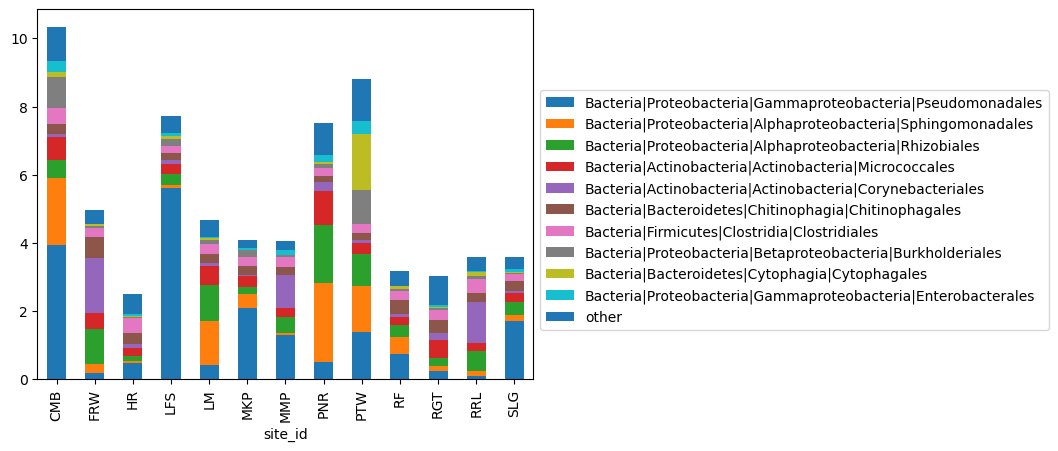

In [22]:
ax = df2.plot.bar(x = 'site_id', stacked=True)
ax.legend(bbox_to_anchor=(1,0.8))

C:\Users\15404\AppData\Local\Temp\ipykernel_21240\35223446.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['other'] = df3.sum(axis = 1)


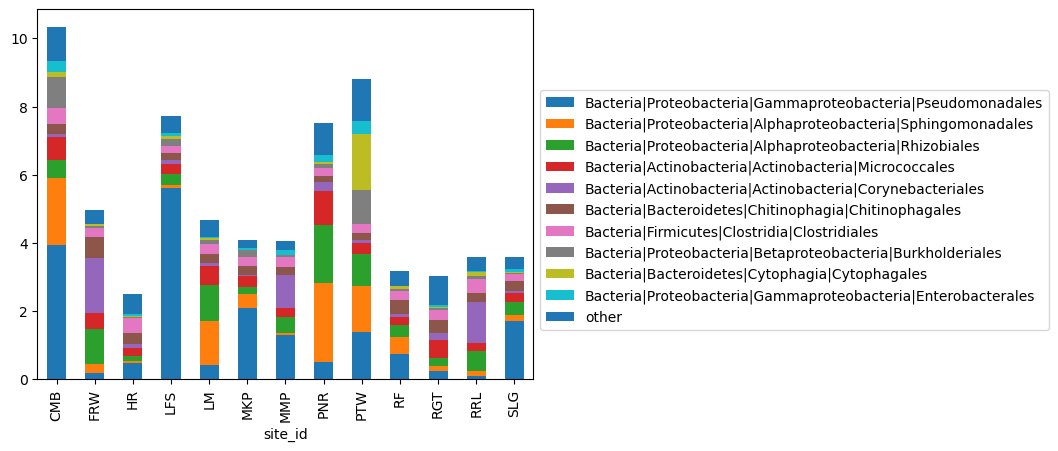

In [23]:
new_columns = df1[taxa_columns].sum().nlargest(10)
col_list = []
for i in new_columns.axes[0]:
    col_list.append(i)
col_list.append('site_id')
other_col = df1.columns
other_col = other_col.drop(col_list)
df2 = df1[col_list]
df3 = df1[other_col]
df2['other'] = df3.sum(axis = 1)
ax = df2.plot.bar(x = 'site_id', stacked=True)
ax.legend(bbox_to_anchor=(1,0.8))